#Initialize Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/EricYangg/4AI3-Walmart-Forecast/main/Datasets/features.csv'
features = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/EricYangg/4AI3-Walmart-Forecast/main/Datasets/stores.csv'
stores = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/EricYangg/4AI3-Walmart-Forecast/main/Datasets/test.csv'
test = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/EricYangg/4AI3-Walmart-Forecast/main/Datasets/train.csv'
train = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/EricYangg/4AI3-Walmart-Forecast/main/Datasets/sampleSubmission.csv'
sample = pd.read_csv(url)

For each row in the test set (store + department + date triplet), you should predict the weekly sales of that department. The Id column is formed by concatenating the Store, Dept, and Date with underscores (e.g. Store_Dept_2012-11-02).  The file should have a header and looks like the following:

#Data Pre-processing:
* Normalize the data,
* Handle missing values,
* Check for outliers,
* Balance vs. imbalanced dataset,
* Features selection

In [3]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [4]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [5]:
test 

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [6]:
sample

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


In [7]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [8]:
feature_train = pd.merge(train,features, on=['Store','Date','IsHoliday'])
feature_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [9]:
train_labels = feature_train['Weekly_Sales']
train_labels

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [10]:
feature_train = feature_train.drop(columns=['Weekly_Sales'])
feature_train

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [11]:
feature_test = pd.merge(test,features, on=['Store','Date','IsHoliday'])
feature_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


#Handle Missing Values

In [12]:
feature_train.isnull().sum()

Store                0
Dept                 0
Date                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [13]:
feature_train['MarkDown1'].value_counts()

1.50       102
460.73     102
175.64      93
9264.48     75
1483.17     75
          ... 
196.40      42
243.47      42
512.15      42
318.51      42
945.96      42
Name: MarkDown1, Length: 2277, dtype: int64

In [14]:
feature_train.shape

(421570, 13)

The markdowns are the only features with the training set that have missing values and we will be replacing them with 0 rather than dropping them due to the fact that it would drop about 3/4th of the rows and if we use these features with our testing set, we won't be able to drop them and will need a placeholder value instead. What that value is whether it be 0 or an average will be determined later

In [15]:
feature_train = feature_train.fillna(0)
feature_train

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
1,1,2,2010-02-05,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
2,1,3,2010-02-05,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
3,1,4,2010-02-05,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
4,1,5,2010-02-05,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [16]:
feature_train.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

As for the missing value handling for the testing set, we will make changes on these missing values based on our feature selection, as if we find some to be not useful, we will drop them 

In [17]:
feature_test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

#Normalize Data


In [18]:
feature_train

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
1,1,2,2010-02-05,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
2,1,3,2010-02-05,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
3,1,4,2010-02-05,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
4,1,5,2010-02-05,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [19]:
#change date and IsHoliday data type
feature_train['Date'] = pd.to_datetime(feature_train['Date']).astype('int64')
feature_train['IsHoliday'] = feature_train['IsHoliday']*1 
feature_train

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,1265328000000000000,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
1,1,2,1265328000000000000,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
2,1,3,1265328000000000000,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
3,1,4,1265328000000000000,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
4,1,5,1265328000000000000,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,1351209600000000000,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,1351209600000000000,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,1351209600000000000,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,1351209600000000000,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

feature_train_scaled = scaler.fit_transform(feature_train)
feature_train_scaled

array([[-1.65819926, -1.41874236, -1.72460527, ..., -0.39518081,
         1.01877417,  0.07820093],
       [-1.65819926, -1.38594689, -1.72460527, ..., -0.39518081,
         1.01877417,  0.07820093],
       [-1.65819926, -1.35315142, -1.72460527, ..., -0.39518081,
         1.01877417,  0.07820093],
       ...,
       [ 1.78325781,  1.66403164,  1.71523026, ..., -0.19118684,
         0.53900326,  0.37928066],
       [ 1.78325781,  1.72962258,  1.71523026, ..., -0.19118684,
         0.53900326,  0.37928066],
       [ 1.78325781,  1.76241805,  1.71523026, ..., -0.19118684,
         0.53900326,  0.37928066]])

#Check for outliers

In [22]:
feature_train_scaled.shape

(421570, 13)

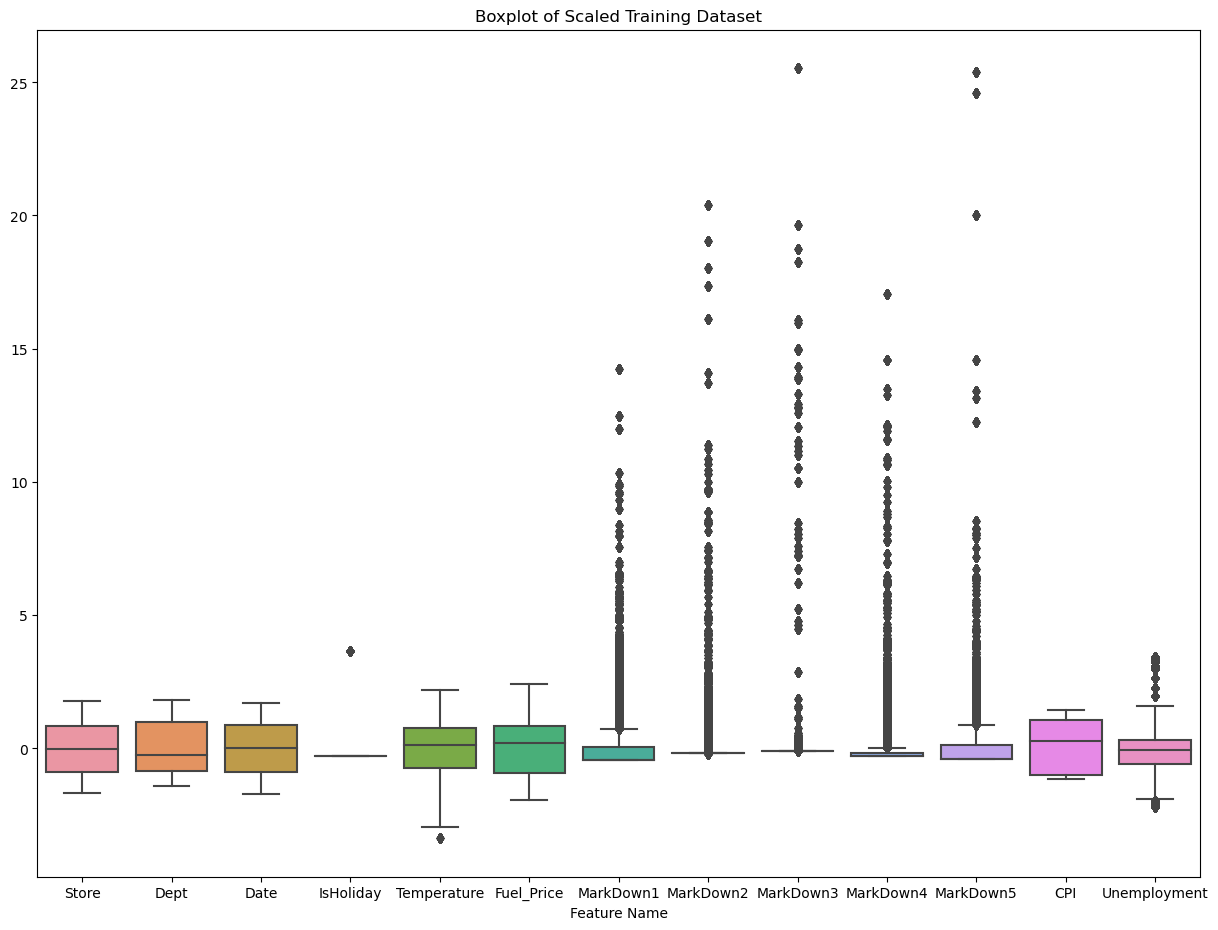

In [23]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 11))
ax = sns.boxplot(data=feature_train_scaled)
ax.set_xticklabels(feature_train.columns)
ax.set_title('Boxplot of Scaled Training Dataset')
ax.set_xlabel('Feature Name')
plt.show()

Removing entries/outliers outside of of +- 3 for z score

In [24]:
import scipy.stats as stats

z = np.abs(stats.zscore(feature_train_scaled))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
feature_train_scaled_clean = feature_train_scaled[(z<3).all(axis=1)]

print('New shape:', feature_train_scaled_clean.shape)
print('Number of outliers removed: ', (feature_train_scaled.shape[0]-feature_train_scaled_clean.shape[0]))

New shape: (361664, 13)
Number of outliers removed:  59906


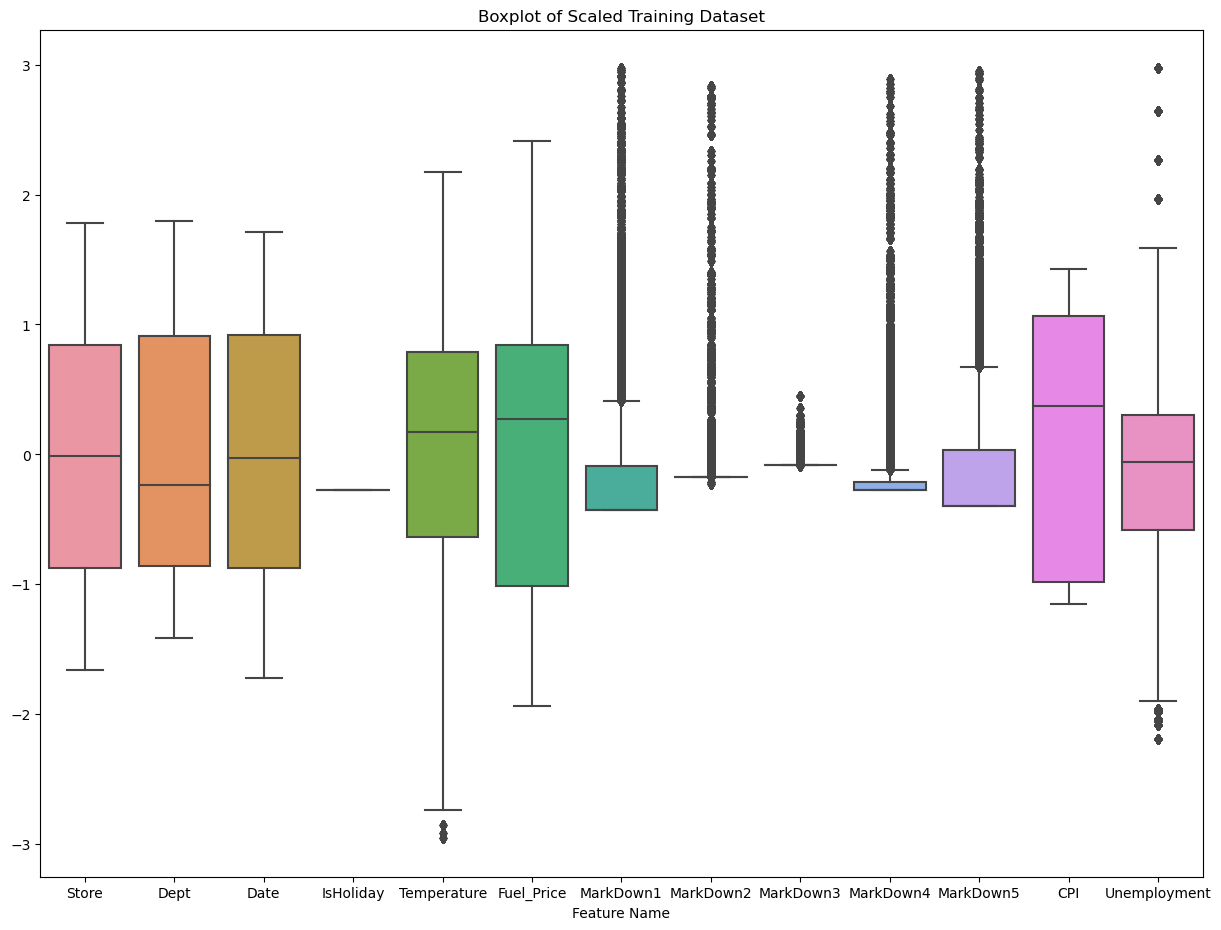

In [25]:
fig, ax = plt.subplots(figsize=(15, 11))
ax = sns.boxplot(data=feature_train_scaled_clean)
ax.set_xticklabels(feature_train.columns)
ax.set_title('Boxplot of Scaled Training Dataset')
ax.set_xlabel('Feature Name')
plt.show()

In [26]:
#get the index where z score less than 3 
rows = np.where(feature_train_scaled[(z<3).all(axis=1)])[0]
rows = np.unique(rows)
rows

array([     0,      1,      2, ..., 361661, 361662, 361663])

In [27]:
#filter out the outliers removed for features dataset on the labels dataset 
train_labels_clean = train_labels.iloc[rows]
print(train_labels_clean.shape)
print(train_labels_clean)       

(361664,)
0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
361659     7457.15
361660    14543.00
361661     2083.00
361662     1660.50
361663    46972.78
Name: Weekly_Sales, Length: 361664, dtype: float64


#Feature selection

In [29]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [30]:
len(feature_train.columns)

13

In [40]:
#Select top feature based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =1)
selector.fit(feature_train_scaled_clean, train_labels_clean)
feature_train.columns[selector.get_support()]

Index(['Store'], dtype='object')

In [41]:
#Select top 3 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =3)
selector.fit(feature_train_scaled_clean, train_labels_clean)
feature_train.columns[selector.get_support()]

Index(['Store', 'CPI', 'Unemployment'], dtype='object')

In [42]:
#Select top 5 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =5)
selector.fit(feature_train_scaled_clean, train_labels_clean)
feature_train.columns[selector.get_support()]

Index(['Store', 'Temperature', 'MarkDown5', 'CPI', 'Unemployment'], dtype='object')

In [43]:
#Select top 7 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =7)
selector.fit(feature_train_scaled_clean, train_labels_clean)
feature_train.columns[selector.get_support()]

Index(['Store', 'Temperature', 'MarkDown1', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')

In [44]:
#Select top 10 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =10)
selector.fit(feature_train_scaled_clean, train_labels_clean)
feature_train.columns[selector.get_support()]

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

#Balance vs Imbalanced Dataset

Split Dataset into train and test

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_train_scaled_clean, train_labels_clean, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(289331, 13)
(72333, 13)
(289331,)
(72333,)
